In [361]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2
a = np.load('pose_result__data_paper_180918_MDN_PR_Fly1_001_SG1_behData_images.pkl')
data = a['points3d'].copy()
print('The dimension is ')
print(data.shape)
t = np.linspace(0,9,899)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dimension is 
(899, 38, 3)


In [362]:
def ag2(angle):
    return angle/np.pi*180
angle3 = ag2(np.load('angle_3d.npy').T)
#angle1 = ag2(np.load('angle_1d.npy').T)
or_angle3 = angle3.copy()

(0, 360)

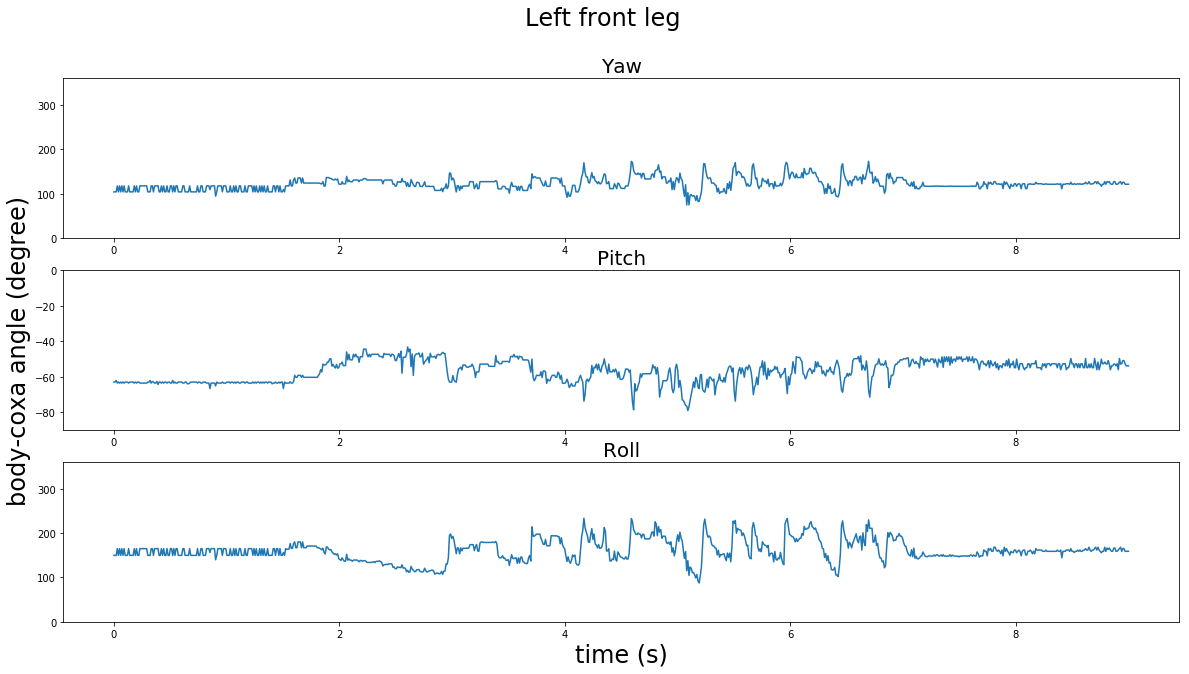

In [395]:
# use only once
#for i in range(899):
#    if(angle3[2,i]>0):
#        angle3[2,i] = angle3[2,i] - 180
#    elif(angle3[2,i]<0):
#        angle3[2,i] = angle3[2,i] + 180    

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left front leg',fontsize=24)
ax1.plot(t,angle3[0])
ax1.set_title('Yaw',fontsize=20)
#ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(0,360)

ax2.plot(t,angle3[1])
ax2.set_title('Pitch',fontsize=20)
ax2.set_ylabel('body-coxa angle (degree)',fontsize=24)
#ax2.set_xlabel('time')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[2])
ax3.set_title('Roll',fontsize=20)
#ax3.set_ylabel('angle',fontsize=24)
ax3.set_xlabel('time (s)',fontsize=24)
ax3.set_ylim(0,360)

In [224]:
fig.savefig('../../Pictures/left_front.jpg')

In [346]:
#angle3[2,angle3[2]<0] += 180
#angle3[2,angle3[2]<0] 
for i in range(899):
    if(angle3[2,i]>0):
        angle3[2,i] = angle3[2,i] - 180
    elif(angle3[2,i]<0):
        angle3[2,i] = angle3[2,i] + 180    

In [203]:
np.set_printoptions(suppress=True) 
print('left front leg: Correlation Matrix')
np.corrcoef(angle3[0:3])

left front leg: Correlation Matrix


array([[ 1.        ,  0.07967606,  0.76546984],
       [ 0.07967606,  1.        , -0.32301646],
       [ 0.76546984, -0.32301646,  1.        ]])

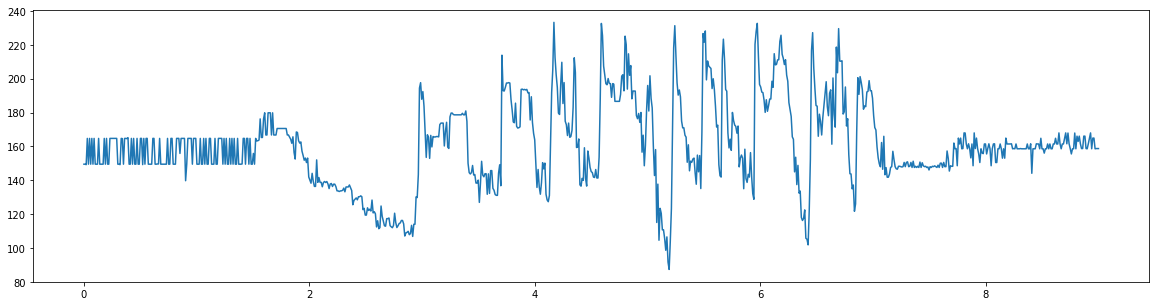

In [393]:
p = 2
tst = or_angle3[p]
avg = tst.mean()
#print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 90)] -= 360
cp[np.where(tst-avg < -90)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[2] = cp

In [8]:
fig.savefig('../../Pictures/conf.jpg')

(-100, 260)

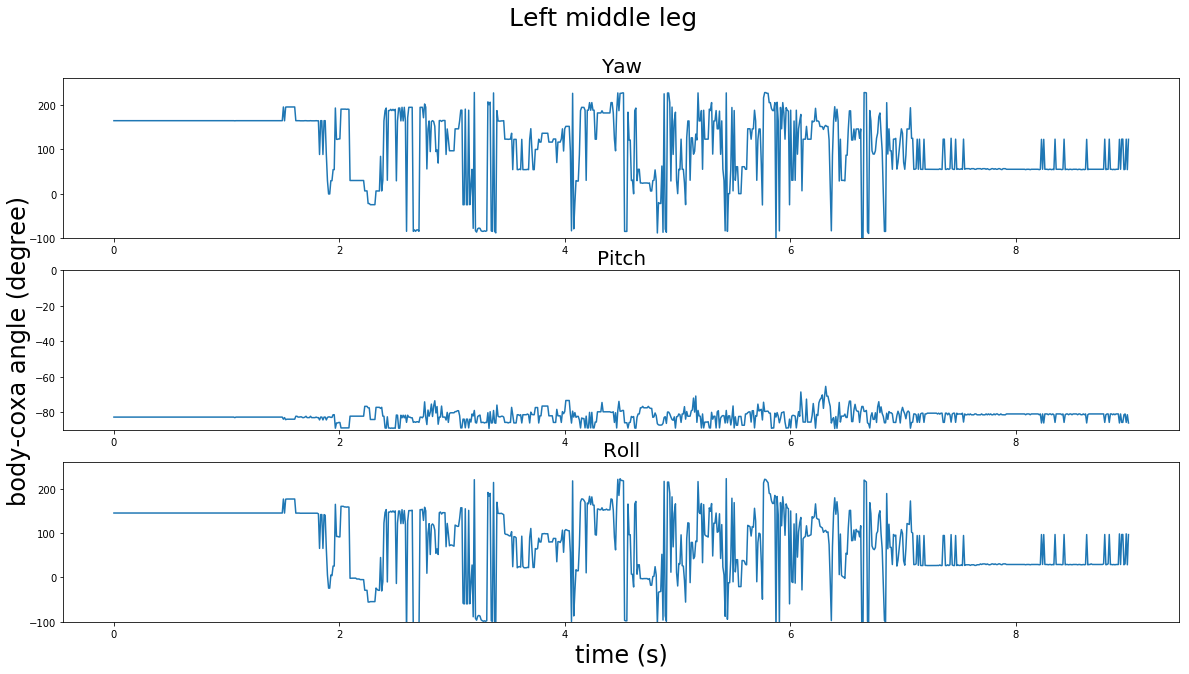

In [469]:
#for i in range(899):
 #   if(angle3[5,i]>0):
 #       angle3[5,i] = angle3[2,i] - 180
 #   elif(angle3[5,i]<0):
 #       angle3[5,i] = angle3[2,i] + 180    
        
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left middle leg',fontsize=25)
ax1.plot(t,angle3[3])
ax1.set_title('Yaw',fontsize=20)
#ax1.set_ylabel('angle (degree)',fontsize=24)
#ax1.set_xlabel('time (s)')
ax1.set_ylim(-100,260)

ax2.plot(t,angle3[4])
ax2.set_title('Pitch',fontsize=20)
ax2.set_ylabel('body-coxa angle (degree)', fontsize=24)
#ax2.set_xlabel('time (s)')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[5])
ax3.set_title('Roll',fontsize=20)
#ax3.set_ylabel('angle (degree)',fontsize=24)
ax3.set_xlabel('time (s)',fontsize=24)
ax3.set_ylim(-100,260)

In [226]:
fig.savefig('../../Pictures/left_middle.jpg')

In [413]:
print('left middle leg: Correlation Matrix')
np.corrcoef(angle3[3:6])

left middle leg: Correlation Matrix


array([[ 1.        , -0.03783527,  0.58284033],
       [-0.03783527,  1.        ,  0.06185082],
       [ 0.58284033,  0.06185082,  1.        ]])

In [15]:
angle3[3][310]

-24.87316837485382

In [16]:
angle3[4][310]

-83.92269149842721

In [17]:
angle3[5][310]

-59.85356293192989

51.08738374929667


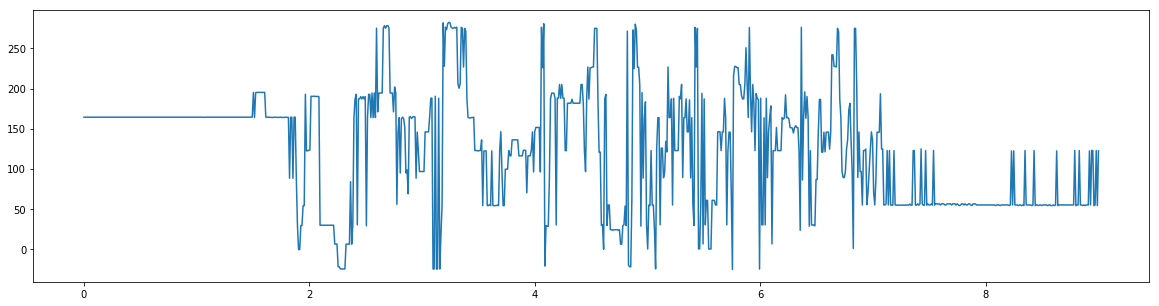

In [481]:
p = 3
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -120)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

66.43716906549807


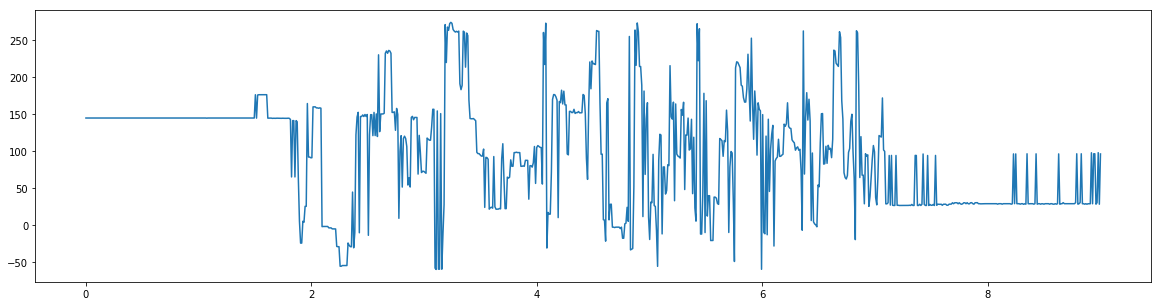

In [476]:
p = 5
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()   #157
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -140)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

[[1.         0.35008356]
 [0.35008356 1.        ]]


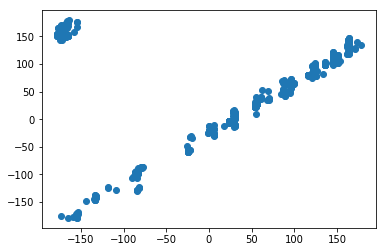

In [470]:
plt.scatter(or_angle3[3],or_angle3[5])
print(np.corrcoef(or_angle3[(3,5),:]))
#plt.axis('off')

[[1.        0.9931879]
 [0.9931879 1.       ]]


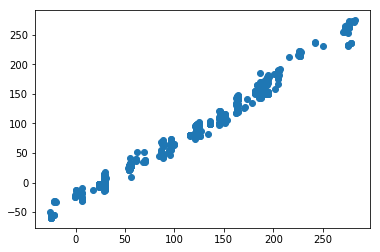

In [548]:
plt.scatter(angle3[3],angle3[5])
print(np.corrcoef(angle3[(3,5),:]))
#plt.axis('off')

66.43716906549807


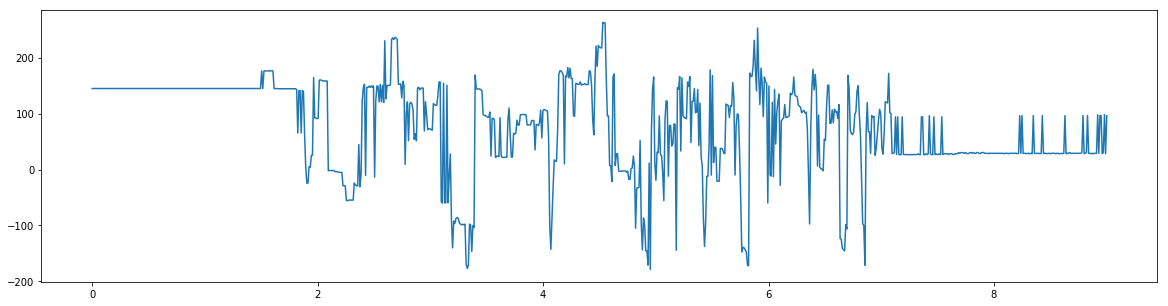

In [437]:
p = 5
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
for i in range(1,899):
    if(abs(cp[i]-cp[i-1]) > 120): 
        cp[i] += 360 * np.sign(cp[i-1] - cp[i])
#cp[np.where(tst-avg < -60)] += 360
cp[np.where(cp < -50)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

(0, 360)

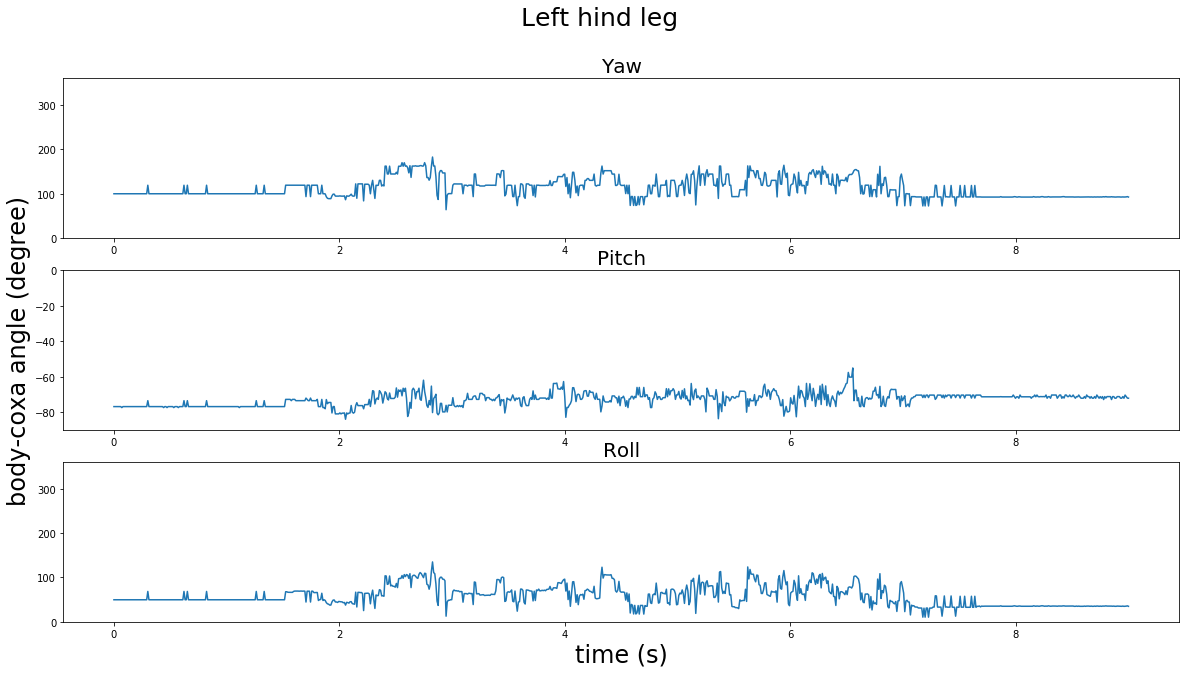

In [554]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left hind leg ',fontsize=25)
ax1.plot(t,angle3[6])
ax1.set_title('Yaw',fontsize=20)
#ax1.set_ylabel('rotation angle (degree)',fontsize=15)
#ax1.set_xlabel('time (s)')
ax1.set_ylim(0,360)

ax2.plot(t,angle3[7])
ax2.set_title('Pitch',fontsize=20)
ax2.set_ylabel('body-coxa angle (degree)', fontsize=24)
#ax2.set_xlabel('time (s)')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[8])
ax3.set_title('Roll',fontsize=20)
#ax3.set_ylabel('rotation angle (degree)',fontsize=15)
ax3.set_xlabel('time (s)',fontsize=24)
ax3.set_ylim(0,360)

In [228]:
fig.savefig('../../Pictures/left_hind_leg.jpg')

In [555]:
print('left hind leg: Correlation Matrix')
np.corrcoef(angle3[6:9])

left hind leg: Correlation Matrix


array([[1.        , 0.23925146, 0.97475176],
       [0.23925146, 1.        , 0.11911729],
       [0.97475176, 0.11911729, 1.        ]])

112.3299397203593


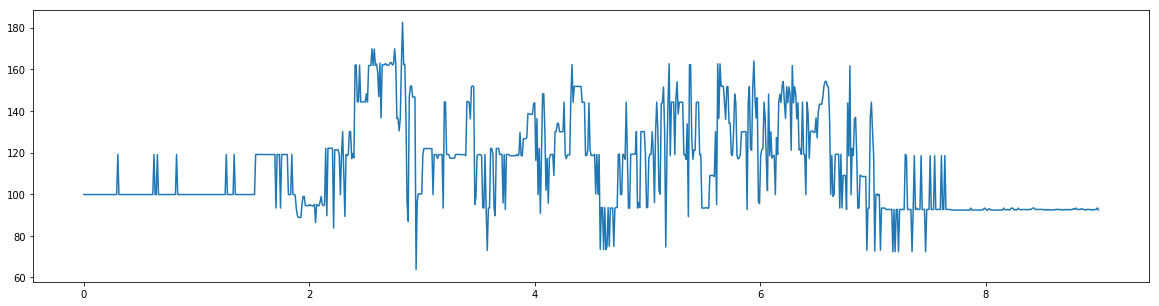

In [551]:
p = 6
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

58.14587701492273


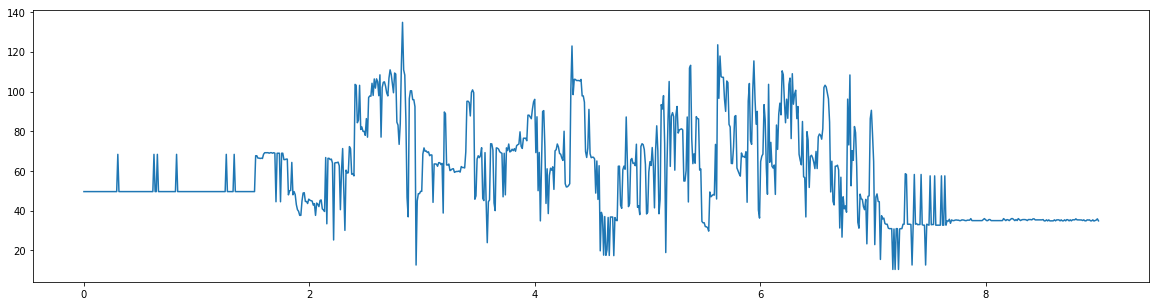

In [552]:
p = 8
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

(0, 360)

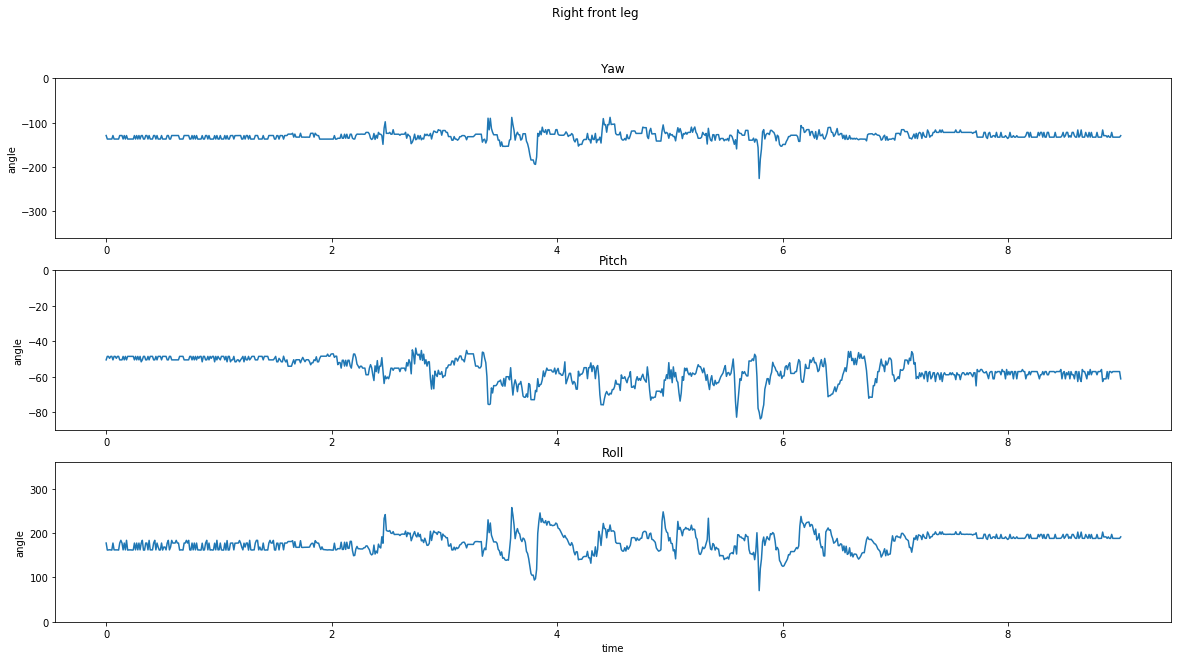

In [370]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right front leg')
ax1.plot(t,angle3[9])
ax1.set_title('Yaw')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(-360,0)

ax2.plot(t,angle3[10])
ax2.set_title('Pitch')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[11])
ax3.set_title('Roll')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(0,360)

In [544]:
print('Right front leg: Correlation Matrix')
np.corrcoef(angle3[9:12])

Right front leg: Correlation Matrix


array([[ 1.        , -0.16254522,  0.79403142],
       [-0.16254522,  1.        , -0.24220312],
       [ 0.79403142, -0.24220312,  1.        ]])

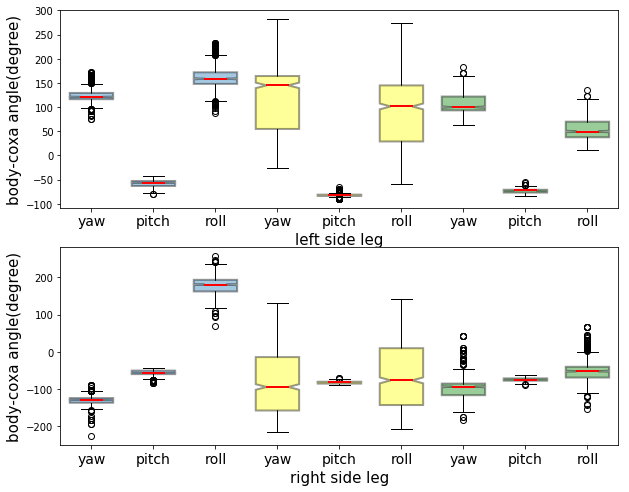

In [572]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
boxplots = ax[0].boxplot(angle3[0:9].T,notch = True, labels=['yaw', 'pitch', 'roll','yaw', 'pitch', 'roll','yaw', 'pitch', 'roll'],
                 boxprops = dict(linestyle='--', linewidth=2, color='Black', alpha = .4),
                 medianprops = dict(linestyle='-', linewidth=2, color='Red'),
                 widths = .7,
           patch_artist=True,)


for i in [3,4,5]:
    boxplot1 = boxplots['boxes'][i]
    boxplot1.set_facecolor('yellow')
for i in [6,7,8]:
    boxplot1 = boxplots['boxes'][i]
    boxplot1.set_facecolor('green')



boxplots = ax[1].boxplot(angle3[9:18].T,notch = True,
                boxprops = dict(linestyle='--', linewidth=2, color='Black', alpha = .4),
                 medianprops = dict(linestyle='-', linewidth=2, color='Red'),
                 widths = .7,
           patch_artist=True,)

for i in [3,4,5]:
    boxplot1 = boxplots['boxes'][i]
    boxplot1.set_facecolor('yellow')
for i in [6,7,8]:
    boxplot1 = boxplots['boxes'][i]
    boxplot1.set_facecolor('green')
    

ax[0].set_xlabel('left side leg',fontsize=15)
ax[0].set_ylabel('body-coxa angle(degree)',fontsize=15)
ax[1].set_xlabel('right side leg',fontsize=15)
ax[1].set_ylabel('body-coxa angle(degree)', fontsize=15)
_ = ax[0].set_xticklabels(labels=['yaw', 'pitch', 'roll','yaw', 'pitch', 'roll','yaw', 'pitch', 'roll'],fontsize=14)  
_ = ax[1].set_xticklabels(labels=['yaw', 'pitch', 'roll','yaw', 'pitch', 'roll','yaw', 'pitch', 'roll'],fontsize=14)  

In [573]:
fig.savefig('../../Pictures/boxplot.jpg')

left front
[[1.         0.76546984]
 [0.76546984 1.        ]]


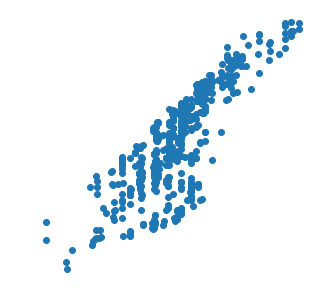

In [595]:
print("left front")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[0],angle3[2])
print(np.corrcoef(angle3[(0,2),:]))
plt.axis('off')
#plt.ylim(50,250)
#plt.xlim(50,250)
fig.savefig('../../Pictures/lf.jpg')

left middle
[[1.        0.9931879]
 [0.9931879 1.       ]]


(-100, 300)

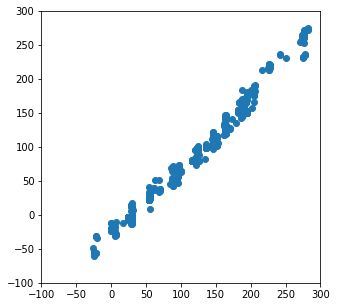

In [524]:
print("left middle")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[3],angle3[5])
print(np.corrcoef(angle3[(3,5),:]))
#plt.axis('off')
plt.ylim(-100,300)
plt.xlim(-100,300)

left hind
[[1.         0.97475176]
 [0.97475176 1.        ]]


(0, 200)

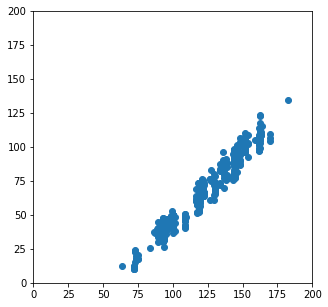

In [589]:
print("left hind")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[6],angle3[8])
print(np.corrcoef(angle3[(6,8),:]))
#plt.axis('off')
plt.ylim(0,200)
plt.xlim(0,200)

In [623]:
print("right front")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[9],angle3[11])
print(np.corrcoef(angle3[(9,11),:]))
#plt.axis('off')
#plt.ylim(50, 270)
#plt.xlim(-250, -30)

fig.savefig('../../Pictures/rf.jpg',transparent=True)


right front
[[1.         0.79403142]
 [0.79403142 1.        ]]


ValueError: list.remove(x): x not in list

<Figure size 360x360 with 1 Axes>

right middle
[[1.         0.99346268]
 [0.99346268 1.        ]]


(-250, 200)

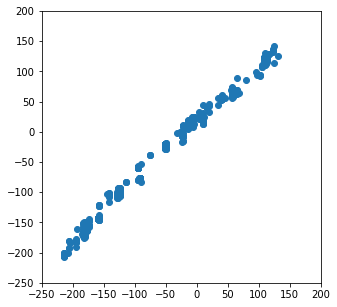

In [514]:
print("right middle")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[12],angle3[14])
print(np.corrcoef(angle3[(12,14),:]))
#plt.axis('off')
plt.ylim(-250,200)
plt.xlim(-250,200)

right hind
[[1.         0.98713991]
 [0.98713991 1.        ]]


AttributeError: 'numpy.ndarray' object has no attribute 'set_yticklabels'

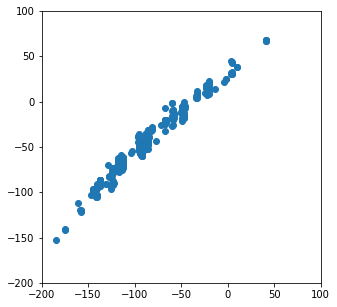

In [610]:
print("right hind")
fig = plt.figure(figsize=(5,5))
plt.scatter(angle3[15],angle3[17])
print(np.corrcoef(angle3[(15,17),:]))
#plt.axis('off')
plt.ylim(-200,100)
plt.xlim(-200,100)


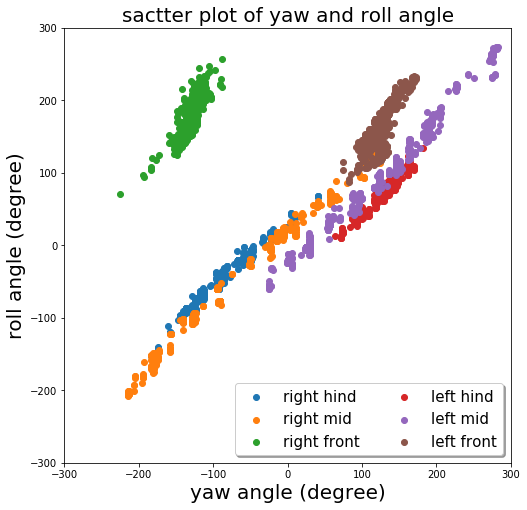

In [635]:
fig = plt.figure(figsize=(8,8))
plt.scatter(angle3[15],angle3[17], label='right hind')
plt.scatter(angle3[12],angle3[14], label='right mid')
plt.scatter(angle3[9],angle3[11], label='right front')

plt.scatter(angle3[6],angle3[8], label='left hind')
plt.scatter(angle3[3],angle3[5], label='left mid')
plt.scatter(angle3[0],angle3[2], label='left front')
plt.ylim(-300,300)
plt.xlim(-300,300)
plt.xlabel('yaw angle (degree)', fontsize=20)
plt.ylabel('roll angle (degree)', fontsize=20)
plt.title("sactter plot of yaw and roll angle", fontsize=20)
plt.legend(loc='best', ncol=2, shadow=True, fancybox=True, fontsize=15)
#leg.get_frame().set_alpha(0.5)
fig.savefig('../../Pictures/scatter_plot.jpg')

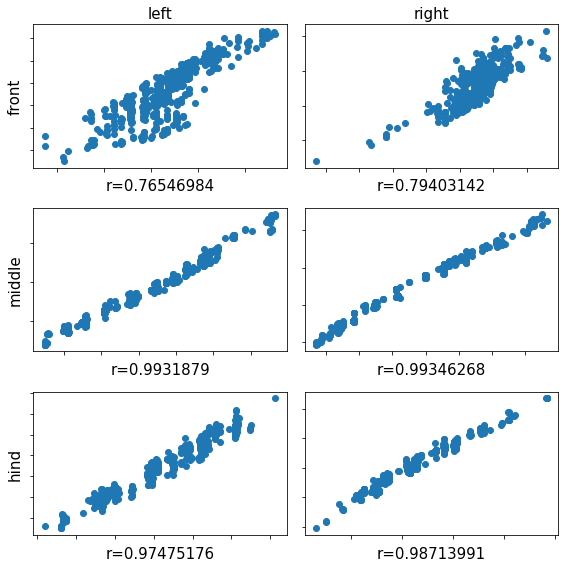

In [628]:
fig, ax = plt.subplots(3,2,figsize=(8,8))
ax[2,1].scatter(angle3[15],angle3[17], label='right hind')
ax[1,1].scatter(angle3[12],angle3[14], label='right mid')
ax[0,1].scatter(angle3[9],angle3[11], label='right front')

ax[2,0].scatter(angle3[6],angle3[8], label='left hind')
ax[1,0].scatter(angle3[3],angle3[5], label='left mid')
ax[0,0].scatter(angle3[0],angle3[2], label='left front')

ax[0,0].set_title('left', fontsize=15)
ax[0,1].set_title('right', fontsize=15)
ax[0,0].set_ylabel('front', fontsize=15)
ax[1,0].set_ylabel('middle', fontsize=15)
ax[2,0].set_ylabel('hind', fontsize=15)

for i in range(3):
    for j in range(2):
        ax[i,j].set_yticklabels([])
        ax[i,j].set_xticklabels([])
        #ax[i,j].spines['top'].set_visible(False)
        #ax[i,j].spines['right'].set_visible(False)
        #ax[i,j].spines['bottom'].set_visible(False)
        #ax[i,j].spines['left'].set_visible(False)

ax[0,0].set_xlabel('r=0.76546984', fontsize=15)
ax[0,1].set_xlabel('r=0.79403142', fontsize=15)
ax[1,0].set_xlabel('r=0.9931879', fontsize=15)
ax[1,1].set_xlabel('r=0.99346268', fontsize=15)
ax[2,0].set_xlabel('r=0.97475176', fontsize=15)
ax[2,1].set_xlabel('r=0.98713991', fontsize=15)
plt.tight_layout()

#fig.suptitle(" N = 899 ", fontsize=15)
#leg.get_frame().set_alpha(0.5)
fig.savefig('../../Pictures/correlation.jpg')

(-180, 180)

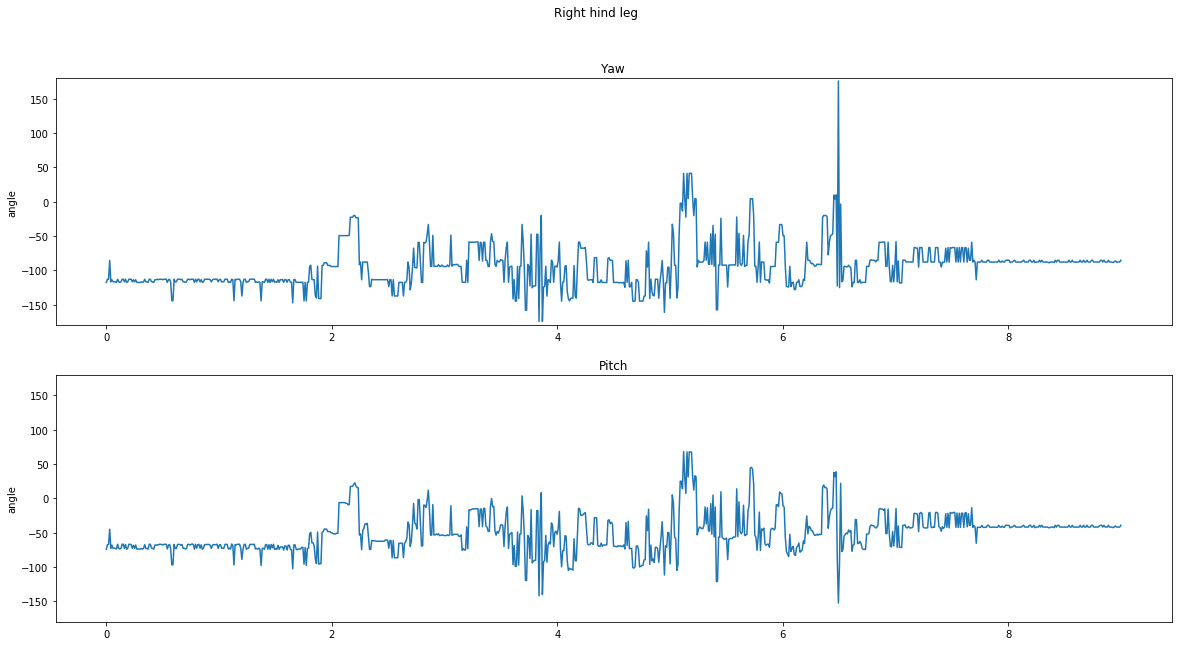

In [489]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (20,10))
fig.suptitle('Right hind leg')
ax1.plot(t,or_angle3[15])
ax1.set_title('Yaw')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(-180,180)

ax2.plot(t,or_angle3[17])
ax2.set_title('Pitch')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(-180,180)

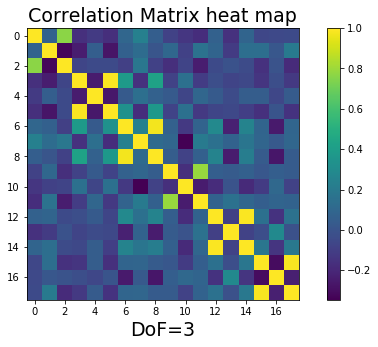

In [634]:
fig = plt.figure(figsize=(10,5))
plt.title('Correlation Matrix heat map', fontsize=19)
plt.imshow(np.corrcoef(angle3))
plt.colorbar()
plt.xlabel('DoF=3',fontsize=19)
fig.savefig('../../Pictures/heatmap_dof3.jpg')

In [577]:
for i in zip(np.where(np.corrcoef(angle3)>0.5)[0],np.where(np.corrcoef(angle3)>0.5)[1]):
    if(i[0]!=i[1]):
        print(i)
np.corrcoef(angle3)[np.where(np.corrcoef(angle3)>0.5)]

(0, 2)
(2, 0)
(3, 5)
(5, 3)
(6, 8)
(8, 6)
(9, 11)
(11, 9)
(12, 14)
(14, 12)
(15, 17)
(17, 15)


array([1.        , 0.76546984, 1.        , 0.76546984, 1.        ,
       1.        , 0.9931879 , 1.        , 0.9931879 , 1.        ,
       1.        , 0.97475176, 1.        , 0.97475176, 1.        ,
       1.        , 0.79403142, 1.        , 0.79403142, 1.        ,
       1.        , 0.99346268, 1.        , 0.99346268, 1.        ,
       1.        , 0.98713991, 1.        , 0.98713991, 1.        ])

-127.44234808258052


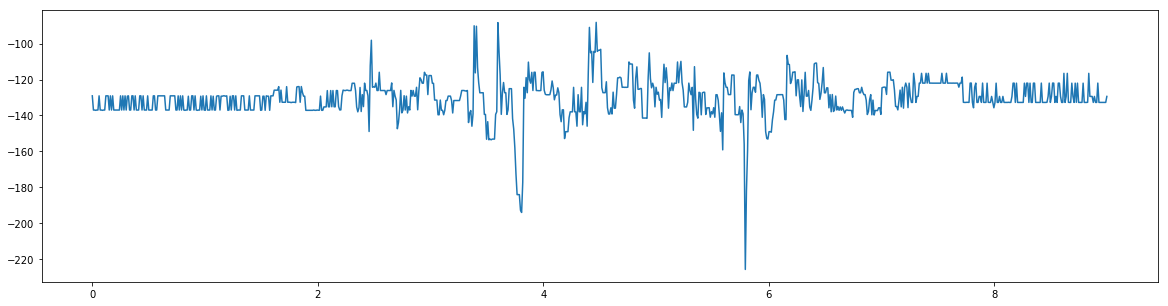

In [367]:
p = 9
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

-2.849891632409085


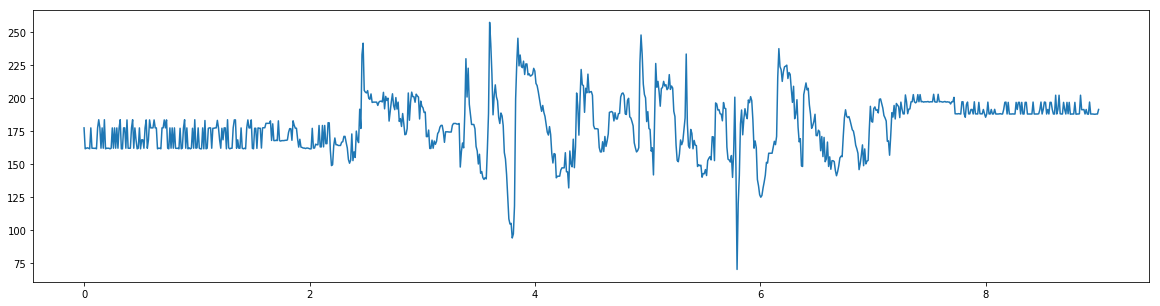

In [369]:
p = 11
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 50)] -= 360
cp += 360
#cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

(-200, 160)

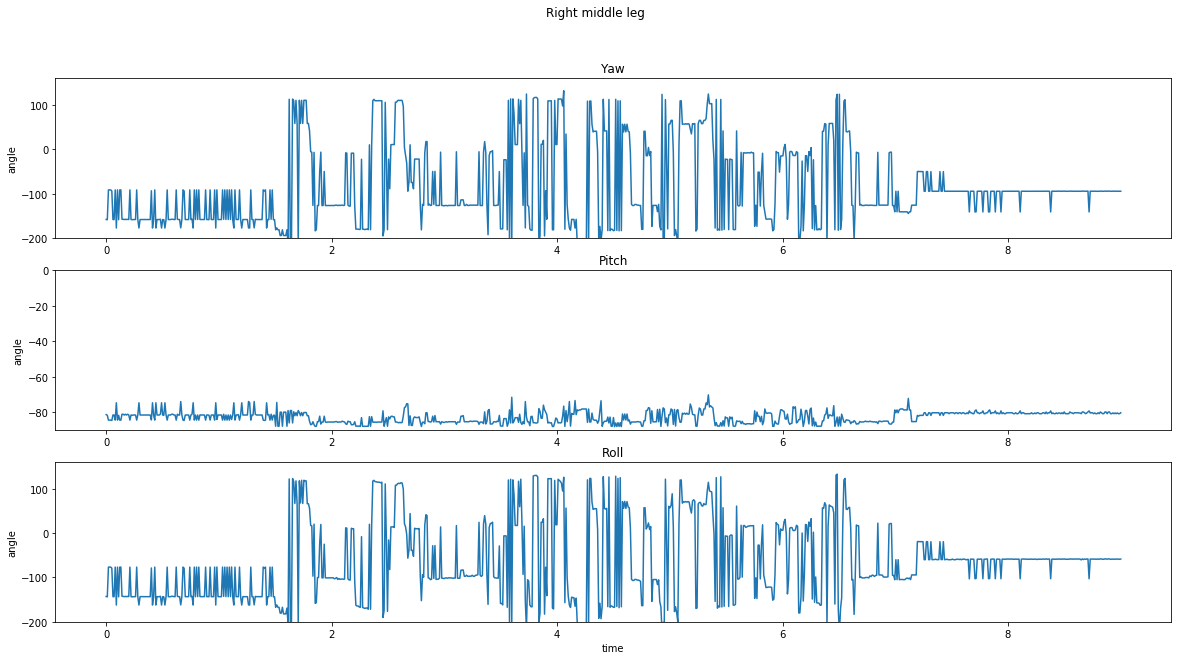

In [375]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right middle leg')
ax1.plot(t,angle3[12])
ax1.set_title('Yaw')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(-200,160)

ax2.plot(t,angle3[13])
ax2.set_title('Pitch')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[14])
ax3.set_title('Roll')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(-200,160)

In [145]:
print('Right middle leg')
np.corrcoef(angle3[12:15])

Right middle leg


array([[ 1.        , -0.09093645,  0.9645484 ],
       [-0.09093645,  1.        , -0.08092557],
       [ 0.9645484 , -0.08092557,  1.        ]])

-45.87261557889671


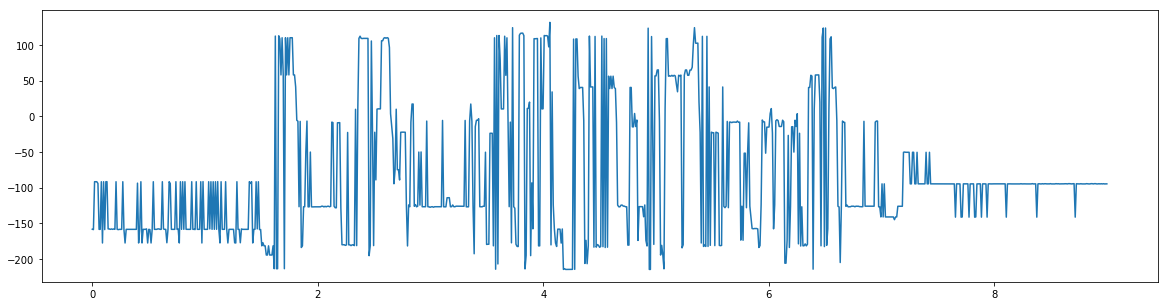

In [372]:
p = 12
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
#cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

-47.27442821771166


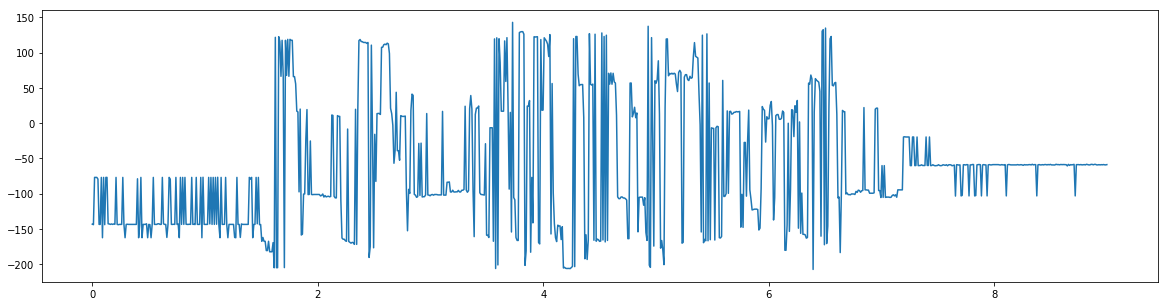

In [500]:
p = 14
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 200)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

[[1.         0.99346268]
 [0.99346268 1.        ]]


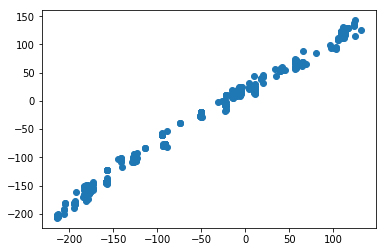

In [502]:
plt.scatter(angle3[12],angle3[14])
print(np.corrcoef(angle3[(12,14),:]))
#plt.axis('off')

(-180, 180)

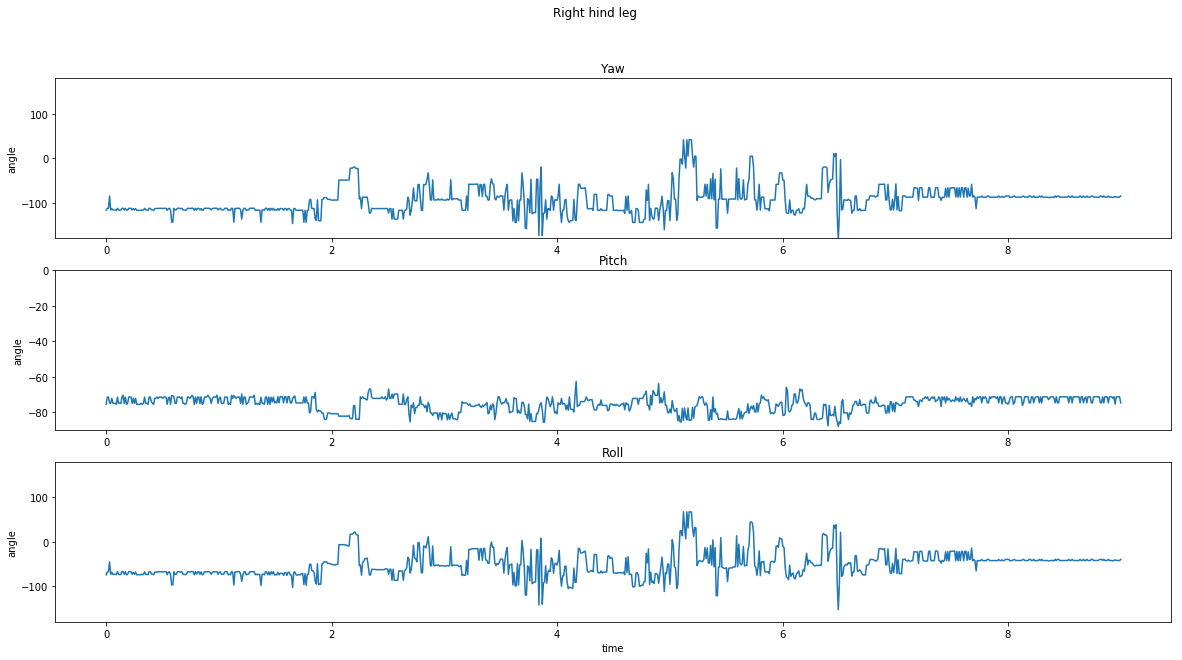

In [379]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right hind leg')
ax1.plot(t,angle3[15])
ax1.set_title('Yaw')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(-180,180)

ax2.plot(t,angle3[16])
ax2.set_title('Pitch')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(-90,0)

ax3.plot(t,angle3[17])
ax3.set_title('Roll')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(-180,180)

In [185]:
print('Right hind leg: Correlation Matrix')
np.corrcoef(angle3[0:3])

Right hind leg: Correlation Matrix


array([[ 1.        ,  0.07967606,  0.76546984],
       [ 0.07967606,  1.        , -0.32301646],
       [ 0.76546984, -0.32301646,  1.        ]])

-94.06953599006972


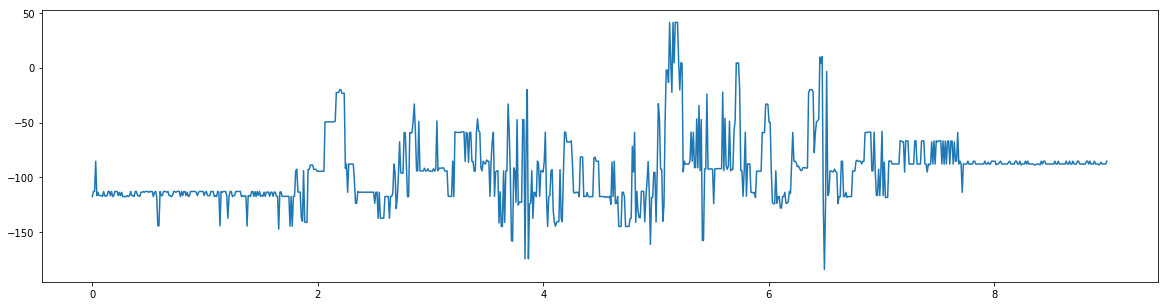

In [377]:
p = 15
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

-50.55515615860245


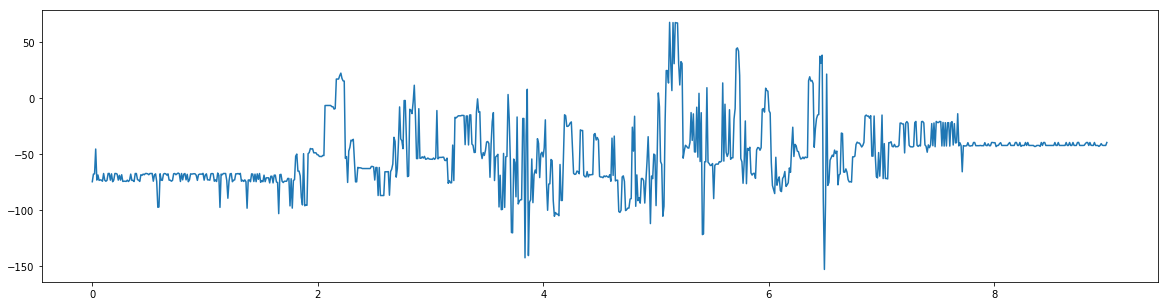

In [378]:
p = 17
tst = or_angle3[p]
avg = tst.mean()
print(avg)
cp = tst.copy()
cp[np.where(tst-avg > 180)] -= 360
cp[np.where(tst-avg < -180)] += 360
fig = plt.figure(figsize=(20,5))
plt.plot(t, cp)
angle3[p] = cp

In [114]:
#np.savetxt('ch_angle3.csv',angle3/180*np.pi)
anlge3 = np.loadtxt('ch_angle3.csv').T

In [38]:
np.savetxt('angle_data3.txt',anlge3,fmt = '%.4f')